This notebook assumes you have already followed the steps in `README.md`. If not, do that first!

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
import argparse
import math
import numpy as np
import os

In [2]:
tf.enable_eager_execution()

In [3]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('data/val/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B2': tf.FixedLenFeature([], tf.string),
        'B3': tf.FixedLenFeature([], tf.string),
        'B4': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


In [4]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

[[[243 244 243]
  [243 243 243]
  [243 244 243]
  ...
  [244 244 245]
  [244 244 245]
  [244 244 245]]

 [[243 244 245]
  [243 244 243]
  [243 244 243]
  ...
  [244 244 245]
  [244 244 245]
  [244 246 246]]

 [[244 244 245]
  [244 244 245]
  [244 244 245]
  ...
  [244 246 245]
  [244 246 246]
  [244 246 246]]

 ...

 [[252 253 252]
  [252 253 252]
  [252 253 252]
  ...
  [253 253 252]
  [252 252 252]
  [252 252 252]]

 [[253 253 252]
  [252 253 252]
  [252 253 252]
  ...
  [252 253 252]
  [252 253 252]
  [252 252 252]]

 [[252 253 252]
  [252 253 252]
  [253 253 252]
  ...
  [252 252 252]
  [252 253 252]
  [252 252 252]]]
2.8400864917552724


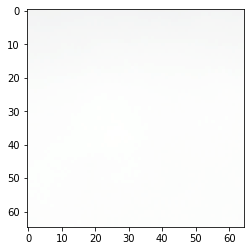

In [5]:
img, label = get_img_from_example(parsed_examples[13])
print(img)
plt.imshow(img)
print(img.std())

In [6]:
img.std()

2.8400864917552724

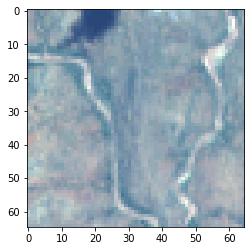

In [7]:
parsed_examples[16]
img, label = get_img_from_example(parsed_examples[16])
plt.imshow(img)

In [8]:
img.std()

26.048751380743994

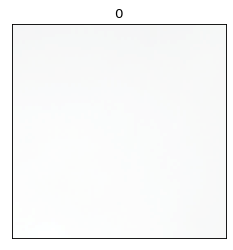

In [9]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(12,13):
    plt.subplot(5, 5, i)
    img, label = get_img_from_example(parsed_examples[i])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()

In [10]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('data/val/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)

    features = {
        'B2': tf.io.FixedLenFeature([], tf.string),
        'B3': tf.io.FixedLenFeature([], tf.string),
        'B4': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.io.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

In [11]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

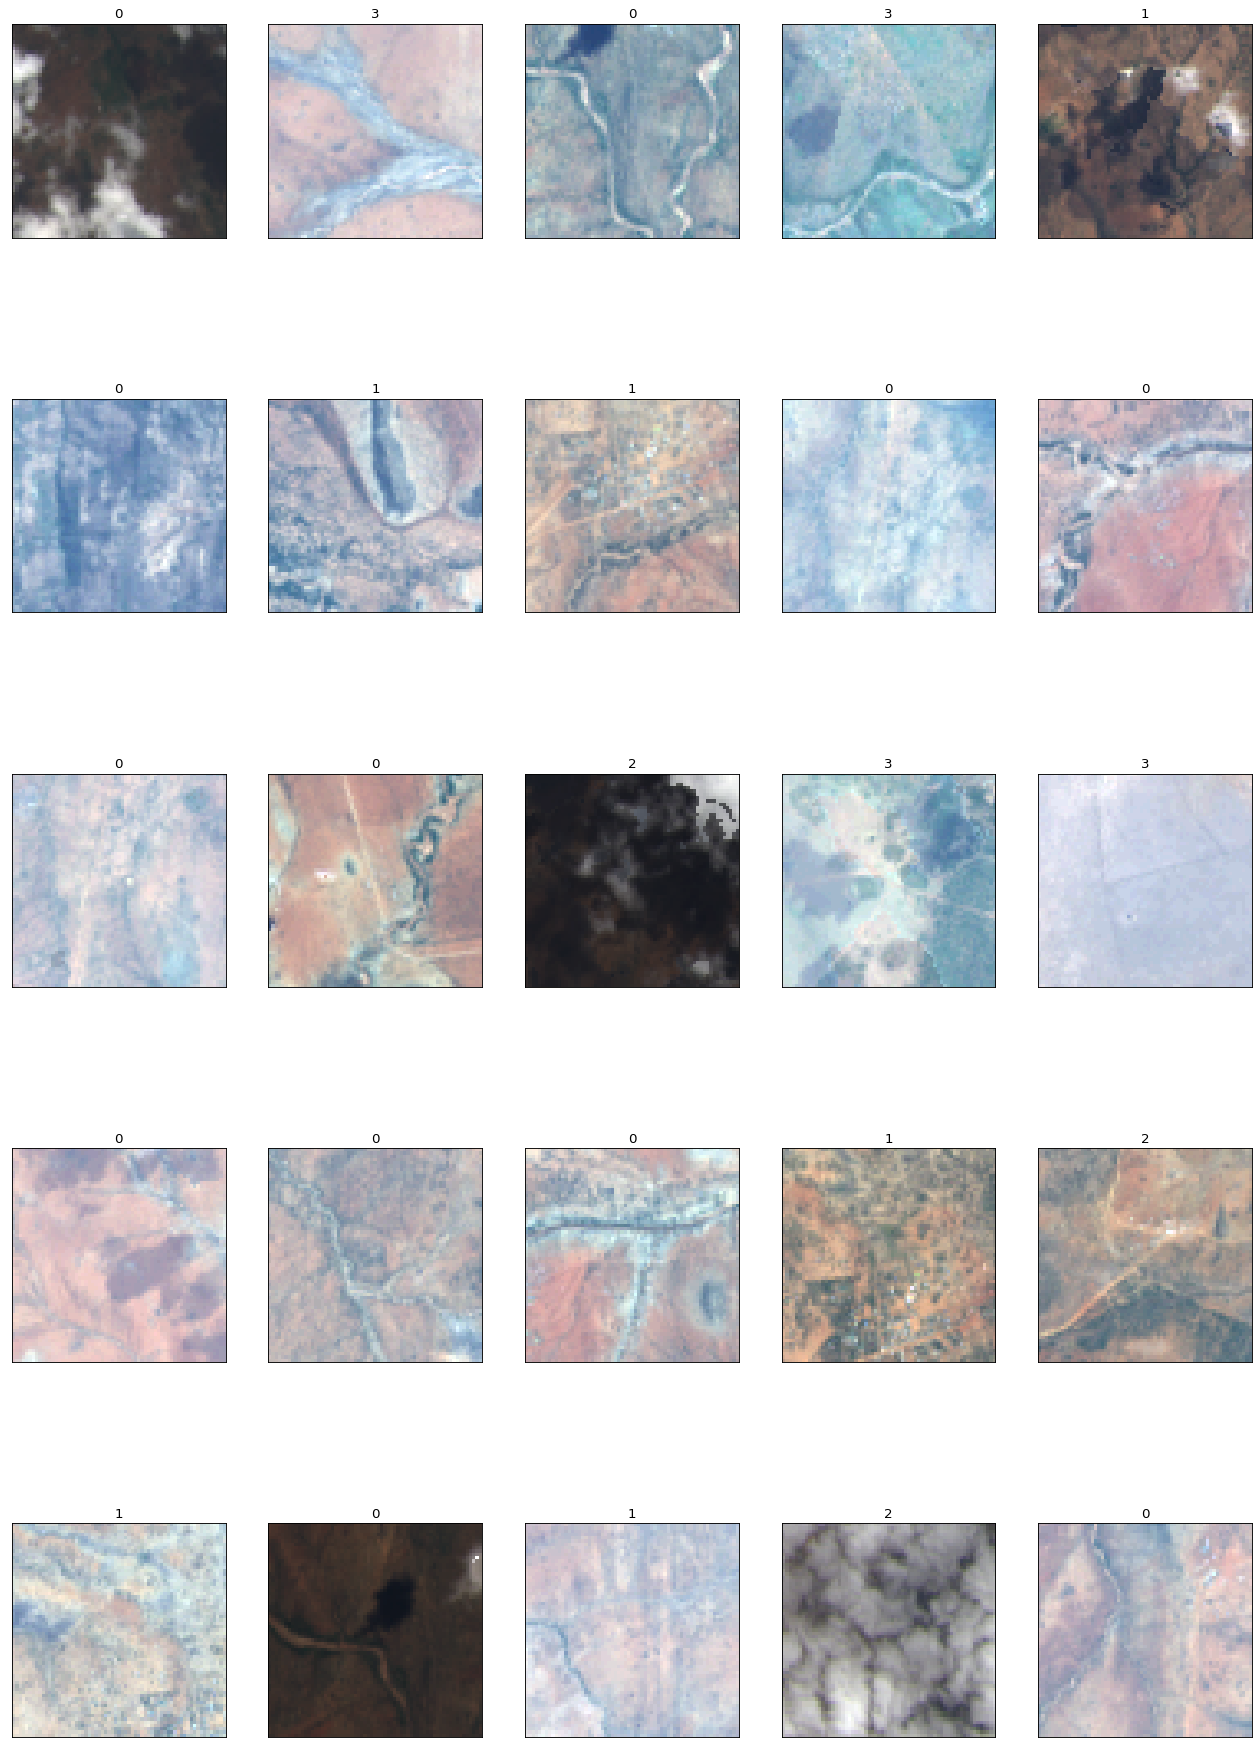

In [12]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(1,26):
    plt.subplot(5, 5, i)
    img, label = get_img_from_example(parsed_examples[i+13])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()

In [13]:
def file_list_from_folder(folder, data_path):
  folderpath = os.path.join(data_path, folder)
  filelist = []
  for filename in os.listdir(folderpath):
    if filename.startswith('part-') and not filename.endswith('gstmp'):
      filelist.append(os.path.join(folderpath, filename))
  return filelist

In [14]:
train = file_list_from_folder("train", "data/")
val = file_list_from_folder("val", 'data/')

In [15]:
features = {
  'B1': tf.io.FixedLenFeature([], tf.string),
  'B2': tf.io.FixedLenFeature([], tf.string),
  'B3': tf.io.FixedLenFeature([], tf.string),
  'B4': tf.io.FixedLenFeature([], tf.string),
  'B5': tf.io.FixedLenFeature([], tf.string),
  'B6': tf.io.FixedLenFeature([], tf.string),
  'B7': tf.io.FixedLenFeature([], tf.string),
  'B8': tf.io.FixedLenFeature([], tf.string),
  'B9': tf.io.FixedLenFeature([], tf.string),
  'B10': tf.io.FixedLenFeature([], tf.string),
  'B11': tf.io.FixedLenFeature([], tf.string),
  'label': tf.io.FixedLenFeature([], tf.int64),
}     

In [70]:
def parse_tfrecords(filelist, batch_size, buffer_size, include_viz=False):
  # try a subset of possible bands
  def _parse_(serialized_example, keylist=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8']):
    example = tf.io.parse_single_example(serialized_example, features)
    
    def getband(example_key):
      img = tf.io.decode_raw(example_key, tf.uint8)
      return tf.reshape(img[:IMG_DIM**2], shape=(IMG_DIM, IMG_DIM, 1))
    
    bandlist = [getband(example[key]) for key in keylist]
    # combine bands into tensor
    image = tf.concat(bandlist, -1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = image.eval(session = sess)
        print(result)
        
    # one-hot encode ground truth labels 
    label = tf.cast(example['label'], tf.int32)
    label = tf.one_hot(label, NUM_CLASSES)
   
    # if logging RGB images as examples, generate RGB image from 11-channel satellite image
    if include_viz:
      image = get_img_from_example(example)
      return {'image' : image, 'label': example['label']}, label
    return {'image': image}, label
    
  tfrecord_dataset = tf.data.TFRecordDataset(filelist) 
  tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(buffer_size).repeat(-1).batch(batch_size)
  tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
  image, label = tfrecord_iterator.get_next()
  return image, label

In [17]:
NUM_TRAIN = 16000
NUM_VAL = 3200
IMG_DIM = 65
NUM_CLASSES = 4
TOTAL_TRAIN = 20000
TOTAL_VAL = 10778
TOTAL_TRAIN2 = 86317
TOTAL_VAL2 = 10778

In [18]:
def load_data(data_path):
  train = file_list_from_folder("train", data_path)
  val = file_list_from_folder("val", data_path)
  return train, val

In [19]:
train_tfrecords, val_tfrecords = load_data("data/")

In [66]:
train_images, train_labels = parse_tfrecords(train_tfrecords, TOTAL_TRAIN, TOTAL_TRAIN)
val_images, val_labels = parse_tfrecords(val_tfrecords, TOTAL_VAL, TOTAL_VAL)
  

OperatorNotAllowedInGraphError: in user code:

    <ipython-input-65-2c2c4cfc0bc1>:29 None  *
        tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(buffer_size).repeat(-1).batch(batch_size)
    <ipython-input-65-2c2c4cfc0bc1>:15 _parse_  *
        result = image.eval(image)
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:913 eval  **
        return _eval_using_default_session(self, feed_dict, self.graph, session)
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:5512 _eval_using_default_session
        return session.run(tensors, feed_dict)
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/client/session.py:957 run
        result = self._run(None, fetches, feed_dict, options_ptr,
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/client/session.py:1115 _run
        if feed_dict:
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:877 __bool__
        self._disallow_bool_casting()
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:490 _disallow_bool_casting
        self._disallow_in_graph_mode("using a `tf.Tensor` as a Python `bool`")
    /home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:477 _disallow_in_graph_mode
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.


In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers 


def initialize_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(65, 65, 7), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation='softmax'))
    
    return model

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers 
# ——— CNN Version 3: Minimal Network + Common tricks + First hyperparameters tests
def initialize_model2():
    model = models.Sequential()

    # First convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), strides=(2,2), input_shape=(65, 65, 7), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    # Second convolution & max-pooling
    model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    return model
    # ––– This is where your Data Scientist skills begin

In [23]:
def initialize_model3():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(65, 65, 7), name='image'))
  model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())

  model.add(layers.Dense(units=128, activation='relu'))
  model.add(layers.Dense(units=4, activation = 'softmax'))
  model.compile(loss=tf.keras.losses.mean_squared_error, 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['mse'])
  return model

In [24]:


def initialize_model4():
  from tensorflow.keras import layers, initializers
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(65, 65, 7), name='image'))
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))
  
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(4, activation='softmax'))
  # set up optimizer
  model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [25]:

model = initialize_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 65, 65, 32)        2048      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

In [26]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [27]:
##############
### Answer ###
##############

from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model4()
#model = compile_model(model)

es = EarlyStopping(patience=20, restore_best_weights=True, verbose=1)

history = model.fit(train_images, train_labels, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=1000, 
                    batch_size=32,verbose = 1, use_multiprocessing = True)

Epoch 1/1000
438/438 [==============================] - 79s 181ms/step - loss: 1.0664 - accuracy: 0.6021 - val_loss: 1.0531 - val_accuracy: 0.5847
Epoch 2/1000
438/438 [==============================] - 85s 195ms/step - loss: 1.0067 - accuracy: 0.6098 - val_loss: 1.0308 - val_accuracy: 0.6062
Epoch 3/1000
438/438 [==============================] - 95s 217ms/step - loss: 0.9826 - accuracy: 0.6191 - val_loss: 1.0086 - val_accuracy: 0.6077
Epoch 4/1000
438/438 [==============================] - 84s 192ms/step - loss: 0.9769 - accuracy: 0.6204 - val_loss: 0.9835 - val_accuracy: 0.6060
Epoch 5/1000
438/438 [==============================] - 90s 205ms/step - loss: 0.9529 - accuracy: 0.6234 - val_loss: 0.9533 - val_accuracy: 0.6190
Epoch 6/1000
173/438 [==========>...................] - ETA: 43s - loss: 0.9420 - accuracy: 0.6319

KeyboardInterrupt: 

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


In [ ]:

plot_history(history)
plt.show()

In [ ]:
res = model.evaluate(val_images, val_labels, verbose=1)

print(f'The accuracy is of {res[1]*100:.3f}%')

# Data augmentation
To easily improve the accuracy of a model without much work, we can generate new data: the data augmentation. This widely used technique consists in applying little transformation to input images without changing its label, as mirroring, cropping, intensity changes, etc. The improved performance simply results from the Neural network training with more different data.

The natural way to generate these new images is to apply some transformations and train the model on the original and new images. However, such procedure requires to keep all these images in memory : it can be very intensive, to the point that your computer memory cannot hold any new image (your computer might even crash).

For this reason, we will augment the data on the fly, meaning that we will create new data, use them to fit the model, then delete them. Here, Keras is our friend as it provides the utils to do all this job for us. Look at the following code : the general writing can seem odd but don't be panicked: just look at the function arguments that defines the augmentation techniques that we will use and that you can check in the documentation.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=(0.8, 1.2),) 

datagen.fit(train_images["image"])

/home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (20000, 65, 65, 7) (7 channels).
  warnings.warn(


In [29]:
# The model
model_2 = initialize_model()
model_2 = compile_model(model_2)

# The data generator
X_tr = train_images["image"][:15000]
y_tr = train_labels[:15000]
X_val = train_images["image"][15000:]
y_val = train_labels[15000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size=32)



/home/ludo915/.pyenv/versions/lewagon/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (15000, 65, 65, 7) (7 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
# The early stopping criterion
es = EarlyStopping(patience=20, restore_best_weights = True)

# The fit
history_2 = model_2.fit(train_flow, 
                        epochs=1000, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val))


Epoch 1/1000
469/469 [==============================] - 74s 157ms/step - loss: 1.1187 - accuracy: 0.5988 - val_loss: 0.9962 - val_accuracy: 0.6080
Epoch 2/1000
469/469 [==============================] - 81s 173ms/step - loss: 1.0034 - accuracy: 0.6121 - val_loss: 0.9803 - val_accuracy: 0.6144
Epoch 3/1000
469/469 [==============================] - 79s 168ms/step - loss: 0.9865 - accuracy: 0.6182 - val_loss: 0.9727 - val_accuracy: 0.6150
Epoch 4/1000
469/469 [==============================] - 84s 178ms/step - loss: 0.9931 - accuracy: 0.6145 - val_loss: 0.9728 - val_accuracy: 0.6182
Epoch 5/1000
469/469 [==============================] - 84s 180ms/step - loss: 0.9790 - accuracy: 0.6187 - val_loss: 0.9777 - val_accuracy: 0.5964
Epoch 6/1000
469/469 [==============================] - 86s 183ms/step - loss: 0.9656 - accuracy: 0.6211 - val_loss: 0.9756 - val_accuracy: 0.6018
Epoch 7/1000
469/469 [==============================] - 78s 167ms/step - loss: 0.9665 - accuracy: 0.6217 - val_loss: 0

KeyboardInterrupt: 